# Project: a simple DC tax calculator
## biof309/spring2020
## Chao-Jung Wu

### Motivation:
This is my first time filing US tax and the tax system is Soooooo complicated.  It would be great to have a simple tax calculater.
Note: this DC tax calculater is just for fun!

### Usage:
You just need to enter your name, gross income, marital status, are you blind or over 65 years old, then you will get a number showing the tax you need to pay.

### Instruction:
name: Please enter your name.
    
gross income: Please enter your gross income.  Which should be a number >= 0
    
marital status: Please enter either "Single" or "Married" (Case sensitive)

blind: If you AND your spouse are blind, please enter "2"; if you OR your spouse are blind, please enter "1"; else please enter "0"

over 65: If you AND your spouse are over 65, please enter "2"; if you OR your spouse are over 65, please enter "1"; else please enter "0"

#### Please noted that all of the information you entered are separated by SPACE.

### Example:
John is a 65 lonely old man.  He is not blind and his gross income is $50000.
John should enter:
    
John 50000 Single 0 1

In [147]:
name, income, marital_status, blind, over_65=input("please enter your name, income, marital status, blind, and over_65: ").split()
print("My name is", name)
# the number of income should >= 0
income=int(income)
if type(income)==int and income>=0:
    print("My income is $", income)
else:
    print("Please enter income number >= 0.")
# limit the marital status to be single or married (accept single or married)
if marital_status=="Single" or marital_status=="Married" or marital_status=="single" or marital_status=="married":
    print("I am", marital_status)
else:
    print("Please let me know if you are single or married.")
# if single, the number of blind people should be 0 or 1; if married, the number of blind people should be 0 or 1 or 2.
blind=int(blind)
if marital_status=="Single" and (blind ==0 or blind ==1):
    print("The number of blind people is", blind)
elif marital_status=="Married" and (blind==0 or blind==1 or blind==2):
    print("The number of blind people is", blind)
elif marital_status=="Single" and blind > 1:
    print("Warning: Are you sure you are single?")
elif marital_status=="Married" and blind > 2:
    print("Warning: Multiple spouse is not allowed...")
else:
    print("Please enter the number of blind people.")
# if single, the number of people >= 65 should be 0 or 1; if married, the number of people >= 65 should be 0 or 1 or 2.
over_65=int(over_65)
if marital_status=="Single" and (over_65 ==0 or over_65 ==1):
    print("The number of people >= 65 is", over_65)
elif marital_status=="Married" and (over_65==0 or over_65==1 or over_65==2):
    print("The number of people >= 65 is", over_65)
elif marital_status=="Single" and over_65 > 1:
    print("Warning: Are you sure you are single?")
elif marital_status=="Married" and over_65 > 2:
    print("Warning: Multiple spouse is not allowed...")
else:
    print("Please enter the number of people >= 65.")
print ("Please double check the above information are correct.")

please enter your name, income, marital status, blind, and over_65:  CJ 7000 Single 0 0


My name is CJ
My income is $ 7000
I am Single
The number of blind people is 0
The number of people >= 65 is 0
Please double check the above information are correct.


In [148]:
class TAX:
    """Simple tax calculator.
    
    Attributes:

        addi_stand_deduc_rate: additional standard deduction if you and/or spouse are blind and/or over 65
        addi_stand_deduc_single: additional standard deduction amount, $1650 * addi_stand_deduc_rate_single
        addi_stand_deduc_married: additional standard deduction amount, $1300 * addi_stand_deduc_rate_married
        taxable_income: estimated taxable income
        tax: estimated tax you need to pay
        
    """
    # define variables
    def __init__ (self, name, income, marital_status, blind, over_65):
        self.name=name
        self.income=int(income)
        self.marital_status=marital_status
        self.blind=int(blind)
        self.over_65=int(over_65)
        # calculate deductable income
        self.__class__.addi_stand_deduc_rate=(self.blind + self.over_65)
        self.__class__.addi_stand_deduc_single=1650 * self.__class__.addi_stand_deduc_rate
        self.__class__.addi_stand_deduc_married=1300 * self.__class__.addi_stand_deduc_rate
        # the standard deduction is $12400 if single and $24800 if married
        if marital_status== ("Single" or "single"):
            self.__class__.taxable_income= (self.income-12400-self.__class__.addi_stand_deduc_single)
        else:
            self.__class__.taxable_income= (self.income-24800-self.__class__.addi_stand_deduc_married)
        # calculate tax (follow DC tax rate table)
        if self.__class__.taxable_income < 10000:
            self.__class__.tax=self.__class__.taxable_income * 0.04
        elif 10000 <= self.__class__.taxable_income < 40000:
            self.__class__.tax=400 + (self.__class__.taxable_income-10000)*0.06
        elif 40000 <= self.__class__.taxable_income < 60000:
            self.__class__.tax=2200 + (self.__class__.taxable_income-40000)*0.065
        elif 60000 <= self.__class__.taxable_income < 350000:
            self.__class__.tax=3500 + (self.__class__.taxable_income-60000)*0.085
        elif 350000 <= self.__class__.taxable_income < 1000000:
            self.__class__.tax=28150 + (self.__class__.taxable_income-350000)*0.0875
        else:
            self.__class__.tax=85025 + (self.__class__.taxable_income-1000000)*0.0895

Final_tax=TAX(name, income, marital_status, blind, over_65)
# the tax you need to pay should >= 0
if Final_tax.tax < 0:
    print("Congrats!", Final_tax.name, "! You don't need to pay tax!")
elif Final_tax.marital_status=="Married":
    print(Final_tax.name, "and his/her spouse need to pay $", Final_tax.tax)
else:
    print(Final_tax.name, "needs to pay $", Final_tax.tax)

Congrats! CJ ! You don't need to pay tax!


### Make tables and figures for tax payer
#### In this calculator, if you are single, there are 4 combinations (blind +/- * over_65 +/-) and three values (0-2).
#### In this calculator, if you are married, there are 9 combinations blind (0, 1, 2) * over_65 (0, 1, 2) and five values (0-4)
#### Make a table and a figure to show the tax you need to pay in every condition when your income is below $100000.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
# There will be too many values...Just calculate the income at the inverval of $100.
income_list=list(range(0, 80000, 100))

In [144]:
# Use loop to calculate the tax and get the table
final_tax_table=pd.DataFrame(columns=["S_0", "S_1", "S_2", "M_0", "M_1", "M_2", "M_3", "M_4"])

for i in income_list:
    # S_0: single deduction $12400
    # S_1: single deduction $12400 + additional deduction $1650 = $14050
    # S_2: single deduction $12400 + additional deduction $1650*2 = $15700
    # M_0: married deduction $24800
    # M_1: married deduction $24800 + additional deduction $1300 = $26100
    # M_2: married deduction $24800 + additional deduction $1300*2 = $27400
    # M_3: married deduction $24800 + additional deduction $1300*3 = $28700
    # M_4: married deduction $24800 + additional deduction $1300*4 = $30000
    taxable_S_0=i-12400
    taxable_S_1=i-14050
    taxable_S_2=i-15700
    taxable_M_0=i-24800
    taxable_M_1=i-26100
    taxable_M_2=i-27400
    taxable_M_3=i-28700
    taxable_M_4=i-30000
    
    # the second loop
    taxable_loop=[taxable_S_0, taxable_S_1, taxable_S_2, taxable_M_0, taxable_M_1, taxable_M_2, taxable_M_3, taxable_M_4]
    final_tax_all=[]
    for j in taxable_loop:
        if j < 0:
            final_tax_all.append(0)
        else:
            if (j<= 10000):
                t=j*0.4
                final_tax_all.append(t)
            elif (10000<j<40000):
                t=400 + (j-22400)*0.06
                final_tax_all.append(t)
            elif (40000<= j <60000):
                t=2200 + (j-40000)*0.065
                final_tax_all.append(t)
            elif (60000<= j <350000):
                t=3500 + (j-60000)*0.085
                final_tax_all.append(t)
            elif (350000<= j <1000000):
                t=28150 + (j-350000)*0.0875
                final_tax_all.append(t)
            else:
                t=85025 + (j-1000000)*0.0895
                final_tax_all.append(t)
    df_append=pd.DataFrame([final_tax_all], columns=["S_0", "S_1", "S_2", "M_0", "M_1", "M_2", "M_3", "M_4"], index=[i])
    final_tax_table=final_tax_table.append(df_append)

In [145]:
final_tax_table

,S_0,S_1,S_2,M_0,M_1,M_2,M_3,M_4
0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
79500,4103.5,3963.25,3823,3155.5,3071,2986.5,2902,2817.5
79600,4112,3971.75,3831.5,3162,3077.5,2993,2908.5,2824
79700,4120.5,3980.25,3840,3168.5,3084,2999.5,2915,2830.5
79800,4129,3988.75,3848.5,3175,3090.5,3006,2921.5,2837


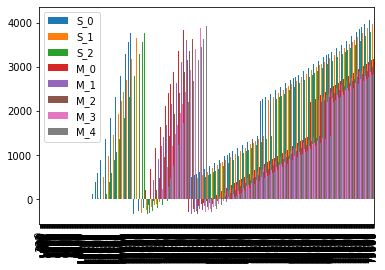

In [146]:
final_tax_table.plot.bar(width=2)